In [4]:
# modules
using LowRankModels, DataFrames, CSV, Plots, Random

file = "acido_CEST_MRI_MegaBox_01_to_08_clean.csv"

# data
df = DataFrame(CSV.File(file));

In [3]:
using CSV, DataFrames

In [6]:
first(df, 6)

,Column1,pH,Conc(mM),ApproT1(sec),ExpT1(ms),ExpT2(ms),ExpB1(percent)
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,6.24,9.987,0.43,402.7,201.72,118.13
2,1,6.38,9.9761,0.43,388.31,214.49,107.81
3,2,6.58,9.98,0.43,393.2,217.77,103.08
4,3,6.69,9.9582,0.43,389.14,217.87,106.21
5,4,6.84,9.9502,0.43,379.38,214.1,111.26
6,5,6.99,9.8863,0.43,398.72,209.58,110.85


In [138]:
A = df[:, 14:end];

In [139]:
size(A)

(36000, 81)

In [140]:
# get observations
obs = observations(A);

In [141]:
# Model
K = 30 #(rank of final data)

losses = QuadLoss() # minimize squared distance to cluster centroids
rx     = ZeroReg() # each row is assigned to exactly one cluster
ry     = ZeroReg() # no regularization on the cluster centroids
glrm   = GLRM(A, losses, rx, ry, K, obs=obs, scale=false);

In [142]:
# initial guess by SVD
init_svd!(glrm);

In [143]:
X, Y, ch = fit!(glrm);

Fitting GLRM
Iteration 10: objective value = 6136.492856130525


LoadError: InterruptException:

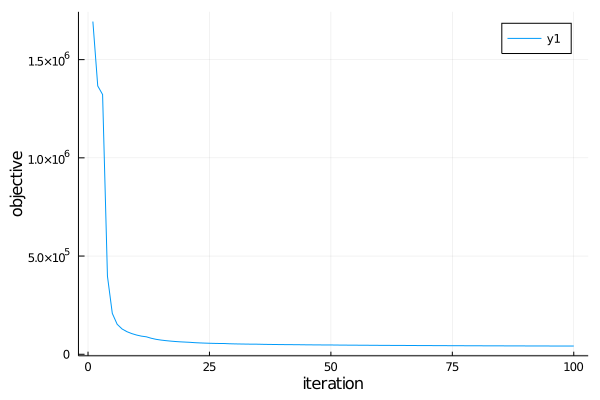

In [144]:
# did it converge? 
plot(ch.objective[2:end])  # first entry is infinite, since initial factors are not nonnegative
xlabel!("iteration")
ylabel!("objective")

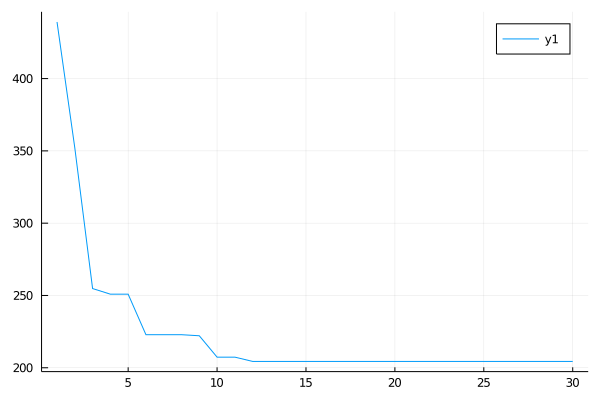

In [146]:
error = zeros(0)

Ks = [1:1:30;]

for j in Ks
Ahat = X'[:,1:j] * Y[1:j,:]
    
append!( error, sum( ( Ahat - convert(Matrix , A ) ).^2 )^(1/2) )
    
end

plot(Ks, error)